<a href="https://colab.research.google.com/github/tamayodb/CCMACLRL_EXERCISES_COM222ML/blob/main/EXERCISE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2

Machine Learning pipeline

1. Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

2. Load the dataset


In [10]:
record_dataset = pd.read_csv("iris.csv")
record_dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
record_dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
record_dataset.drop('Id', axis=1, inplace=True)

In [13]:
record_dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
record_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [18]:
record_dataset['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


3. Visualize the dataset

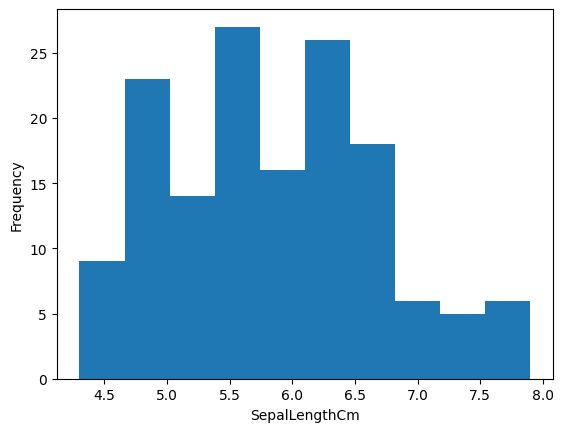

In [19]:
plt.hist(record_dataset['SepalLengthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequency')
plt.show()

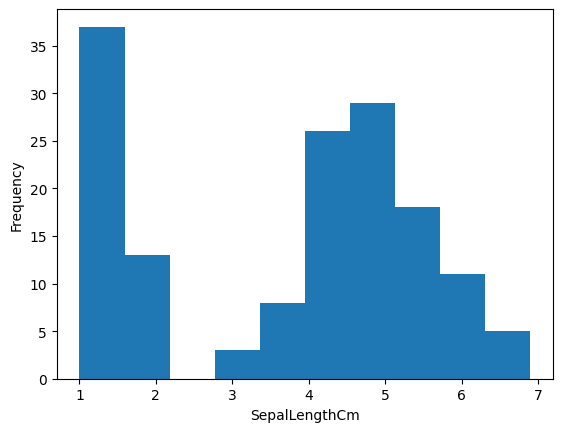

In [21]:
plt.hist(record_dataset['PetalLengthCm'])
plt.xlabel('SepalLengthCm')
plt.ylabel('Frequency')
plt.show()

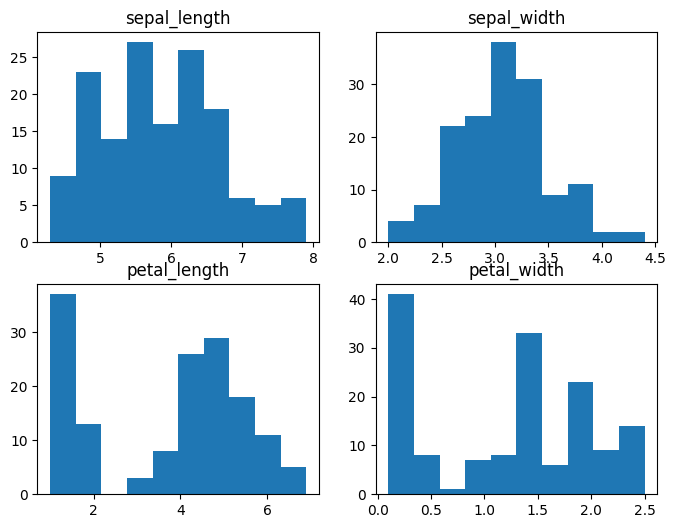

In [24]:
fig, ax = plt.subplots (2,2, figsize=(8,6))
ax[0, 0].hist (record_dataset ["SepalLengthCm"])
ax[0, 1].hist (record_dataset ["SepalWidthCm"])
ax[1, 0].hist (record_dataset ["PetalLengthCm"])
ax[1, 1].hist (record_dataset ["PetalWidthCm"])
ax [0, 0].set_title("sepal_length")
ax[0, 1].set_title("sepal_width")
ax [1, 0].set_title("petal_length")
ax[1, 1].set_title("petal_width")
plt.show()

In [34]:
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}

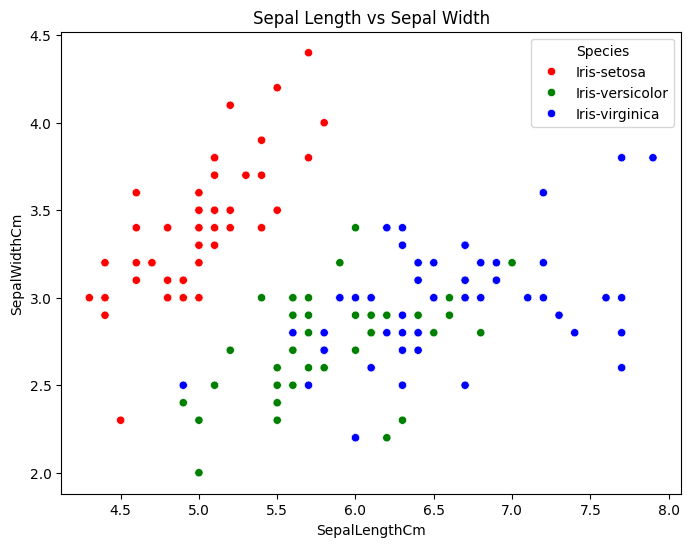

In [35]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x="SepalLengthCm",y="SepalWidthCm", hue="Species", data=record_dataset, palette=colors)
plt.title("Sepal Length vs Sepal Width")

plt.show()

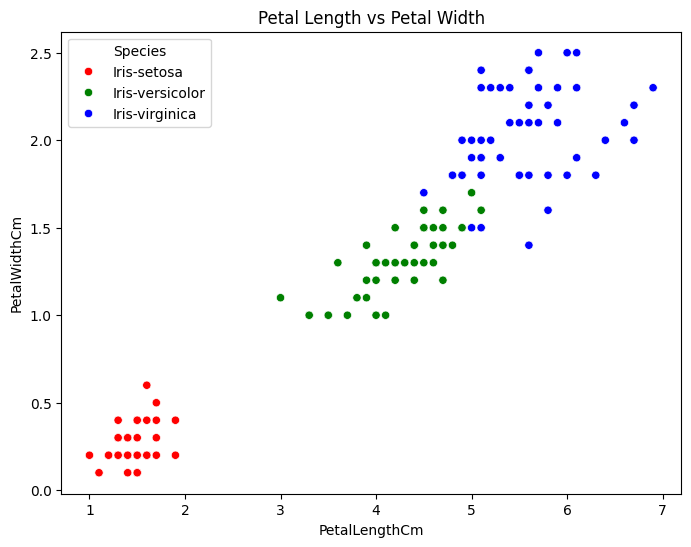

In [36]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x="PetalLengthCm",y="PetalWidthCm", hue="Species", data=record_dataset, palette=colors)
plt.title("Petal Length vs Petal Width")

plt.show()

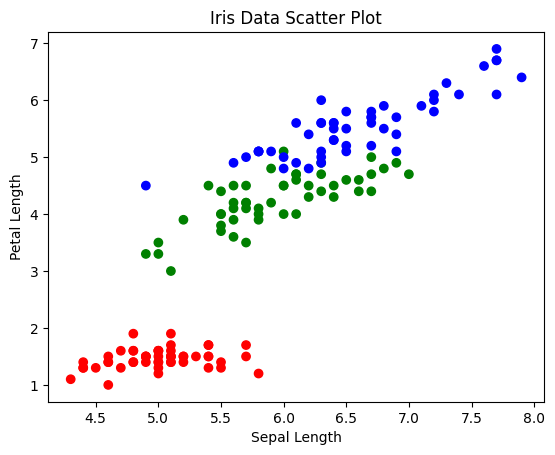

In [41]:
plt.scatter(record_dataset["SepalLengthCm"], record_dataset["PetalLengthCm"], c=record_dataset['Species'].map(colors))
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.title("Iris Data Scatter Plot")

plt.show()

4. Split the dataset into a training set and a testing set

In [43]:
X = record_dataset.drop('Species', axis=1).values
y = record_dataset['Species'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


5. Train the model

In [48]:
knn = KNeighborsClassifier(n_neighbors=13)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9666666666666667

6. Test the model

In [49]:
knn.predict([[5.1, 3.5, 1.4, 0.2]])

array(['Iris-setosa'], dtype=object)

In [50]:
knn.predict([[6.7, 3.0, 5.2, 2.3]])

array(['Iris-virginica'], dtype=object)

In [54]:
knn.predict([[3.0, 3.0, 5.2, 1.2]])

array(['Iris-versicolor'], dtype=object)